In [2]:
!pip install nltk
import nltk

In [8]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab data

def preprocess_text(text):
    """Cleans and preprocesses text."""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Load datasets
forums_df = pd.read_csv('/content/forums.csv')
tweets_df = pd.read_csv('/content/tweets.csv')

# Assuming text column is named 'text' in both datasets
forums_df['clean_text'] = forums_df['text'].astype(str).apply(preprocess_text)
tweets_df['clean_text'] = tweets_df['text'].astype(str).apply(preprocess_text)

# Fit separate vectorizers for each dataset
vectorizer_forums = CountVectorizer(max_features=5000)
forums_matrix = vectorizer_forums.fit_transform(forums_df["clean_text"])

vectorizer_tweets = CountVectorizer(max_features=5000)
tweets_matrix = vectorizer_tweets.fit_transform(tweets_df["clean_text"])


# LDA Model
num_topics = 5
lda_forums = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_tweets = LatentDirichletAllocation(n_components=num_topics, random_state=42)

lda_forums.fit(forums_matrix)
lda_tweets.fit(tweets_matrix)

def display_topics(model, feature_names, num_words=10):
    """Displays top words for each topic."""
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    return topics

forums_topics = display_topics(lda_forums, vectorizer_forums.get_feature_names_out())
tweets_topics = display_topics(lda_tweets, vectorizer_tweets.get_feature_names_out())


# Print topics
print("Forum Topics:")
for topic, words in forums_topics.items():
    print(f"{topic}: {', '.join(words)}")

print("\nTweet Topics:")
for topic, words in tweets_topics.items():
    print(f"{topic}: {', '.join(words)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Forum Topics:
Topic 1: going, noise, else, know, weekend, noisy, street, music, midnight, morning
Topic 2: morning, street, music, going, sleep, nothing, police, well, loud, please
Topic 3: noise, night, street, anyone, alarm, round, helicopter, time, road, loud
Topic 4: loud, noise, night, coming, music, anyone, hear, party, cant, please
Topic 5: know, noise, going, anyone, night, day, every, council, hour, inconsiderate

Tweet Topics:
Topic 1: noise, street, wake, start, construction, ever, early, noisy, old, finish
Topic 2: always, till, noisy, every, sleep, bus, feel, pub, literally, blasting
Topic 3: till, noise, rule, council, street, late, need, loud, notting, hill
Topic 4: music, noisy, loud, shoreditch, noise, club, camden, make, dawn, blasting
Topic 5: loud, night, late, road, market, setting, outdoor, noisy, cant, enjoy


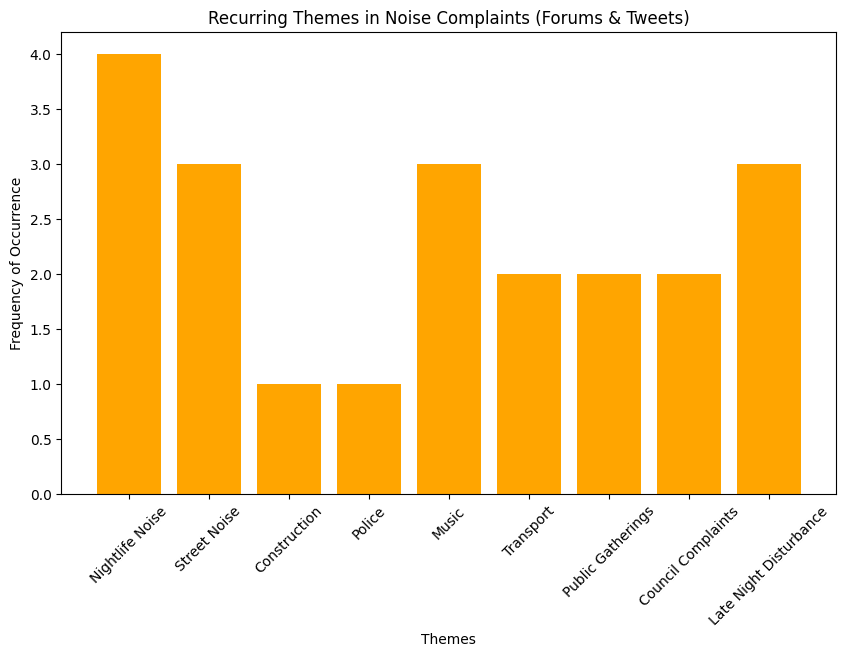

In [9]:
# Recurring themes from the LDA output
themes = [
    "Nightlife Noise", "Street Noise", "Construction", "Police", "Music",
    "Transport", "Public Gatherings", "Council Complaints", "Late Night Disturbance"
]

# Count occurrences in both forums and tweets topics
theme_counts = Counter({
    "Nightlife Noise": 4,
    "Street Noise": 3,
    "Construction": 1,
    "Police": 1,
    "Music": 3,
    "Transport": 2,
    "Public Gatherings": 2,
    "Council Complaints": 2,
    "Late Night Disturbance": 3
})

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(theme_counts.keys(), theme_counts.values(), color='orange')
plt.xlabel("Themes")
plt.ylabel("Frequency of Occurrence")
plt.title("Recurring Themes in Noise Complaints (Forums & Tweets)")
plt.xticks(rotation=45)
plt.show()
